In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv("data.csv", encoding='latin-1')
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [3]:
df.shape

(13169, 13)

In [4]:
import sqlite3
conn = sqlite3.connect('data-cleansing-putri.db')
cursor = conn.execute ("SELECT * FROM tabelfile;") #gunakan bintang untuk ambil semua data
for row in cursor:
    print (row)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
sql_query = pd.read_sql_query ('''
                               SELECT
                               fileclean
                               FROM tabelfile
                               ''', conn)
conn.close()

In [6]:
dfsql = pd.DataFrame(sql_query, columns = ['fileclean'])

In [7]:
df['tweet-clean'] = dfsql
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,tweet-clean
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,semua cowok berusaha melacak perhatian gue lan...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa telat memberi tau edan sarap gue bergaul...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,41 kadang berpikir tetap percaya tuhan padahal...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,ku tau matamu sipit dilihat mana
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir kelihatan dongoknya awal tam...


In [8]:
df.duplicated().sum()

125

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
tweet-clean      0
dtype: int64

In [11]:
df.shape

(13044, 14)

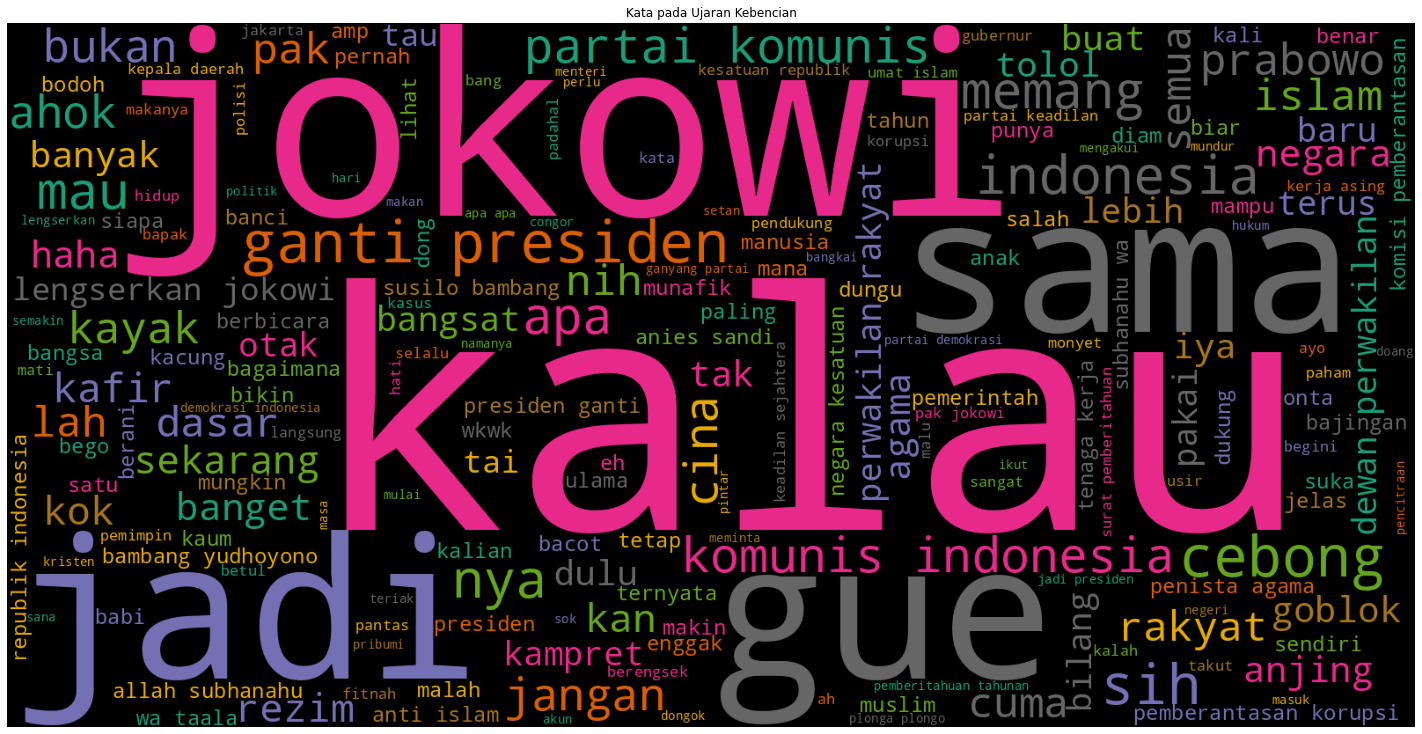

In [12]:
#wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

HS = df.loc[(df['HS'] == True)]
word = pd.Series(' '.join(HS['tweet-clean']).split())
text = ' '.join(word)

wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Kata pada Ujaran Kebencian')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

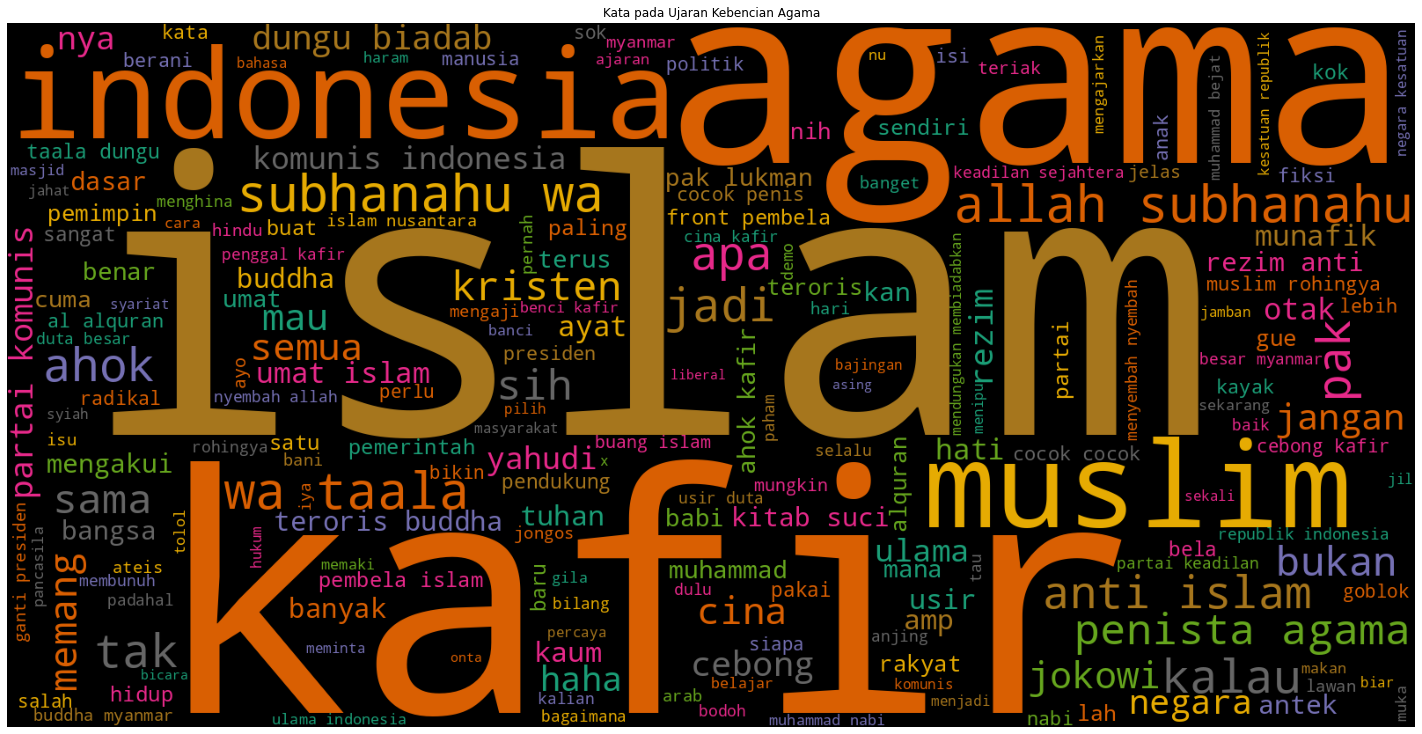

In [13]:
#wordcloud
HSR = df.loc[(df['HS_Religion'] == True)]
word = pd.Series(' '.join(HSR['tweet-clean']).split())
text = ' '.join(word)

wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Kata pada Ujaran Kebencian Agama')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

0    7526
1    5518
Name: HS, dtype: int64

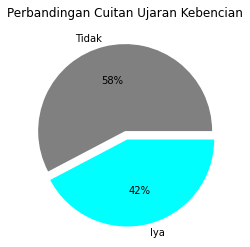

In [14]:
explode = [0, 0.1] 
s = df['HS'].value_counts()
label= ['Tidak','Iya']
plt.pie(s,labels = label, explode=explode, autopct='%.0f%%', colors=['grey','cyan'])
plt.title('Perbandingan Cuitan Ujaran Kebencian')
s

0    8039
1    5005
Name: Abusive, dtype: int64

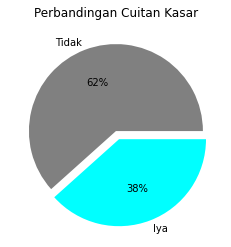

In [15]:
explode = [0, 0.1] 
s = df['Abusive'].value_counts()
label= ['Tidak','Iya']
plt.pie(s,labels = label, explode=explode, autopct='%.0f%%', colors=['grey','cyan'])
plt.title('Perbandingan Cuitan Kasar')
s

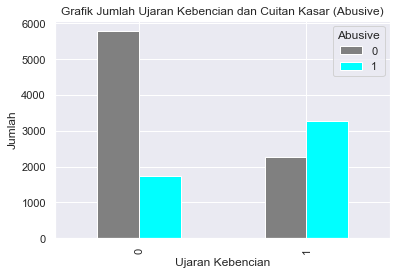

In [16]:
import seaborn as sns
sns.set()

dff1= pd.crosstab(df['HS'],df['Abusive'])
dff1.plot(kind='bar', color=['grey','cyan'])
plt.xlabel('Ujaran Kebencian')
plt.ylabel('Jumlah')
plt.title('Grafik Jumlah Ujaran Kebencian dan Cuitan Kasar (Abusive)')
plt.show()

0    12255
1      789
Name: HS_Religion, dtype: int64

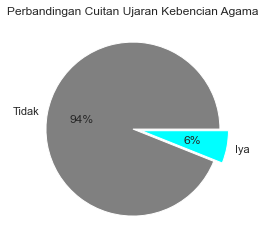

In [17]:
explode = [0, 0.1] 
s = df['HS_Religion'].value_counts()
label= ['Tidak','Iya']
plt.pie(s,labels = label, explode=explode, autopct='%.0f%%', colors=['grey','cyan'])
plt.title('Perbandingan Cuitan Ujaran Kebencian Agama')
s

## KHUSUS HS TRUE

In [18]:
HS = df.HS == True
df1=df[HS]
df1.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,tweet-clean
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,semua cowok berusaha melacak perhatian gue lan...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir kelihatan dongoknya awal tam...
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0,bani taplak kawan kawan
10,"Setidaknya gw punya jari tengah buat lu, sebel...",1,1,1,0,0,0,0,0,1,1,0,0,gue punya jari tengah buat gue ukur nyali sama...
11,USER USER USER USER BANCI KALENG MALU GA BISA ...,1,1,1,0,0,0,0,1,0,1,0,0,banci kaleng malu jawab pertanyaan 2 hari lalu...


In [19]:
df1.shape

(5518, 14)

1    3262
0    2256
Name: Abusive, dtype: int64

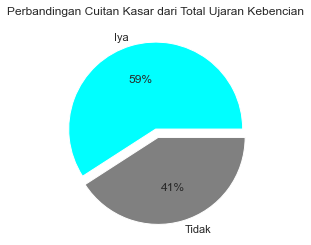

In [20]:
explode = [0, 0.1] 
s = df1['Abusive'].value_counts()
label= ['Iya','Tidak']
plt.pie(s,labels = label, explode=explode, autopct='%.0f%%', colors=['cyan','grey'])
plt.title('Perbandingan Cuitan Kasar dari Total Ujaran Kebencian')
s

Text(0.5, 1.0, 'Grafik Jumlah Jenis Ujaran Kebencian')

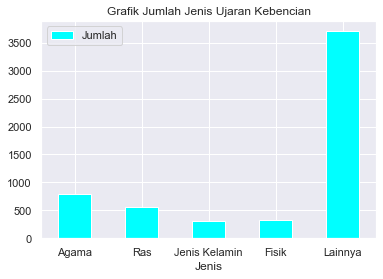

In [21]:
rel = df1['HS_Religion'].sum()
rac = df1['HS_Race'].sum()
gen = df1['HS_Gender'].sum()
phy = df1['HS_Physical'].sum()
oth = df1['HS_Other'].sum()

df2 = pd.DataFrame({'Jenis':['Agama', 'Ras', 'Jenis Kelamin', 'Fisik','Lainnya'], 'Jumlah':[rel, rac, gen,phy,oth]})
ax = df2.plot.bar(x='Jenis', y='Jumlah', rot=0, color = 'cyan')
plt.title('Grafik Jumlah Jenis Ujaran Kebencian')

Text(0.5, 1.0, 'Perbandingan Cuitan Ujaran Kebencian Agama dari Total Ujaran Kebencian')

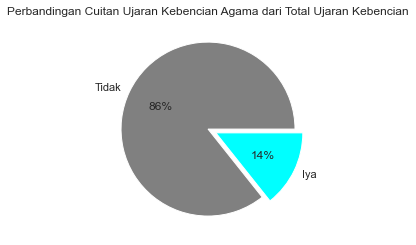

In [22]:
explode = [0, 0.1] 
s = df1['HS_Religion'].value_counts()
label= ['Tidak','Iya']
plt.pie(s,labels = label, explode=explode, autopct='%.0f%%', colors=['grey','cyan'])
plt.title('Perbandingan Cuitan Ujaran Kebencian Agama dari Total Ujaran Kebencian')

Text(0.5, 1.0, 'Level Ujaran Kebencian')

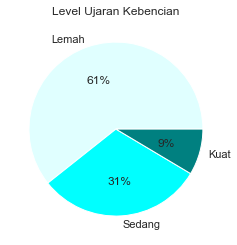

In [23]:
a = df1['HS_Weak'].sum()
b = df1['HS_Moderate'].sum()
c = df1['HS_Strong'].sum()
s = [a,b,c]
label= ['Lemah','Sedang','Kuat']
plt.pie(s,labels = label, autopct='%.0f%%', colors=['lightcyan','cyan','teal'])
plt.title('Level Ujaran Kebencian')

Text(0.5, 1.0, 'Level Ujaran Kebencian Agama')

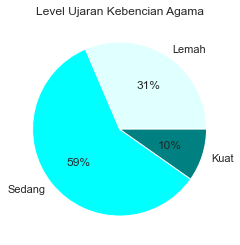

In [24]:
#religion dengan tingkat
relwe = ((df1['HS_Religion'] == True) & (df1['HS_Weak'] == True)).sum()
relmo = ((df1['HS_Religion'] == True) & (df1['HS_Moderate'] == True)).sum()
relst = ((df1['HS_Religion'] == True) & (df1['HS_Strong'] == True)).sum()
s = [relwe,relmo,relst]
label= ['Lemah','Sedang','Kuat']
plt.pie(s,labels = label, autopct='%.0f%%', colors=['lightcyan','cyan','teal'])
plt.title('Level Ujaran Kebencian Agama')

In [25]:
#apakah
jumlahhs = rel + rac + gen + phy + oth
print (jumlahhs)
#jumlahhs lebih daripada jumlah hs yang sesungguhnya, sehingga pasti ada data yang beririsan

5684


Text(0.5, 1.0, 'Ujaran Kebencian Agama pada Individu dan Grup')

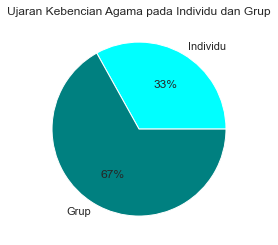

In [26]:
#religion dengan individu atau group
relind = ((df1['HS_Religion'] == True) & (df1['HS_Individual'] == True)).sum()
relgro = ((df1['HS_Religion'] == True) & (df1['HS_Group'] == True)).sum()
s = [relind,relgro]
label= ['Individu','Grup']
plt.pie(s,labels = label, autopct='%.0f%%', colors=['cyan','teal'])
plt.title('Ujaran Kebencian Agama pada Individu dan Grup')

### AGAMA dengan yang Lain

In [27]:
df1.corr()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
HS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abusive,NaN,1.000000,0.056351,-0.056351,-0.061521,-0.187331,0.199161,0.187882,-0.016346,0.124374,0.039308,-0.282093
HS_Individual,NaN,0.056351,1.000000,-1.000000,-0.264677,-0.261169,0.118372,0.079458,0.235347,0.928484,-0.891919,-0.149721
HS_Group,NaN,-0.056351,-1.000000,1.000000,0.264677,0.261169,-0.118372,-0.079458,-0.235347,-0.928484,0.891919,0.149721
HS_Religion,NaN,-0.061521,-0.264677,0.264677,1.000000,0.023087,-0.061930,-0.030559,-0.584154,-0.244523,0.248119,0.017604
HS_Race,NaN,-0.187331,-0.261169,0.261169,0.023087,1.000000,-0.078804,-0.068272,-0.482065,-0.251998,0.146263,0.198749
HS_Physical,NaN,0.199161,0.118372,-0.118372,-0.061930,-0.078804,1.000000,0.021212,-0.356014,0.130777,-0.095620,-0.070608
HS_Gender,NaN,0.187882,0.079458,-0.079458,-0.030559,-0.068272,0.021212,1.000000,-0.345323,0.093581,-0.061173,-0.062490
HS_Other,NaN,-0.016346,0.235347,-0.235347,-0.584154,-0.482065,-0.356014,-0.345323,1.000000,0.203359,-0.176757,-0.063476
HS_Weak,NaN,0.124374,0.928484,-0.928484,-0.244523,-0.251998,0.130777,0.093581,0.203359,1.000000,-0.828133,-0.379892


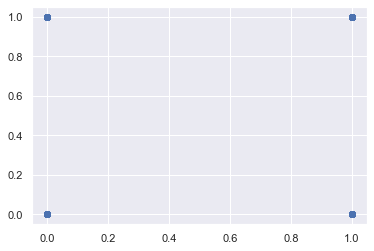

In [28]:
plt.scatter(df1['HS_Religion'],df1['HS_Race'])

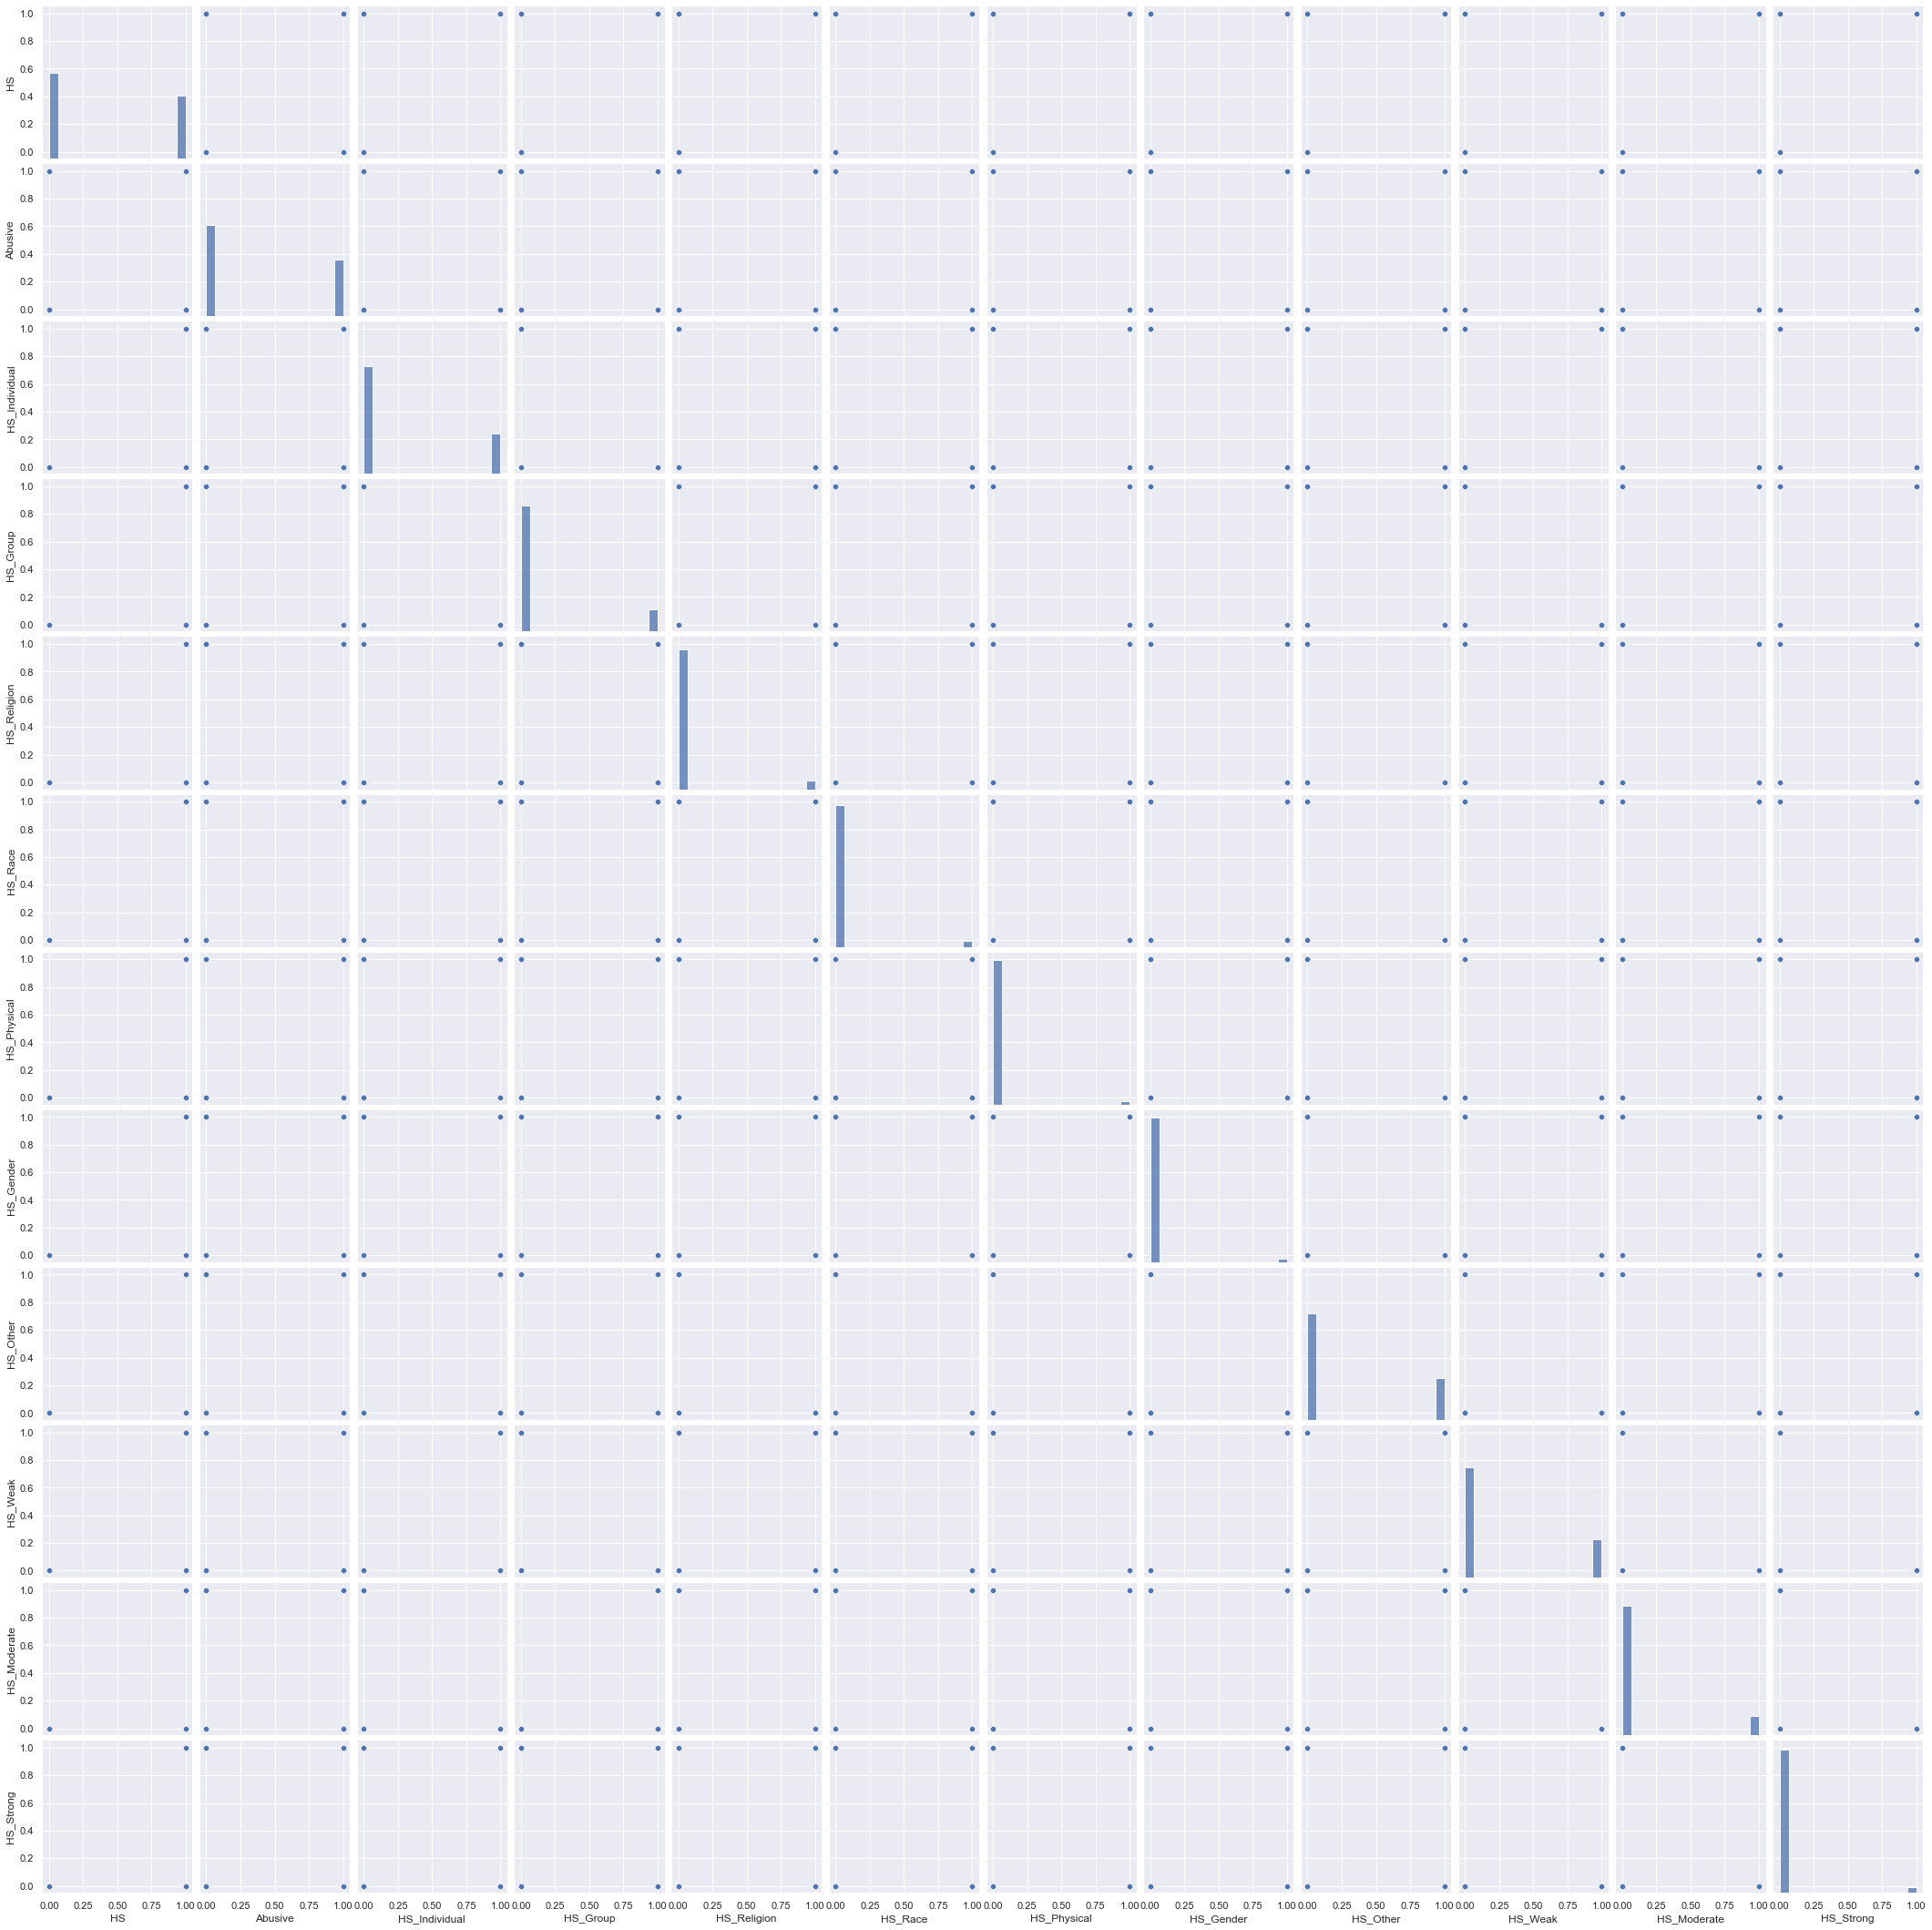

In [29]:
fig = sns.pairplot(df)

In [64]:
#!pip install matplotlib-venn

You should consider upgrading via the 'C:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


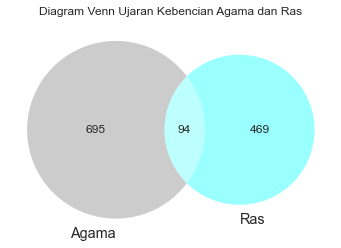

In [30]:
from matplotlib_venn import venn2

relra = ((df1['HS_Religion'] == True) & (df1['HS_Race'] == True)).sum()
a = rel - relra
b = rac - relra
venn2(subsets = (a, b, relra), set_labels = ('Agama', 'Ras'), set_colors=('grey', 'cyan'))
plt.title('Diagram Venn Ujaran Kebencian Agama dan Ras')
plt.show()

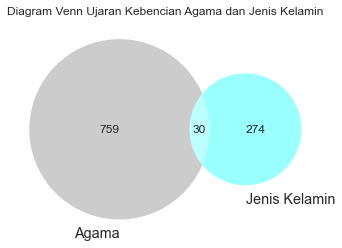

In [32]:
relgen = ((df1['HS_Religion'] == True) & (df1['HS_Gender'] == True)).sum()
a = rel - relgen
b = gen - relgen
venn2(subsets = (a, b, relgen), set_labels = ('Agama', 'Jenis Kelamin'), set_colors=('grey', 'cyan'))
plt.title('Diagram Venn Ujaran Kebencian Agama dan Jenis Kelamin')
plt.show()

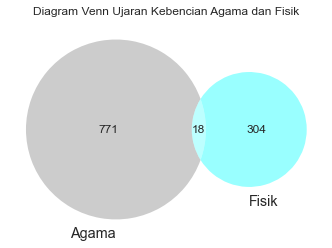

In [33]:
relphy = ((df1['HS_Religion'] == True) & (df1['HS_Physical'] == True)).sum()
a = rel - relphy
b = phy - relphy
venn2(subsets = (a, b, relphy), set_labels = ('Agama', 'Fisik'), set_colors=('grey', 'cyan'))
plt.title('Diagram Venn Ujaran Kebencian Agama dan Fisik')
plt.show()

In [34]:
hsall = ((df1['HS_Religion'] == True) & (df1['HS_Race'] == True) &
         (df1['HS_Gender'] == True) & (df1['HS_Physical'] == True)).sum()
print (hsall)

0


In [35]:
relragen = ((df1['HS_Religion'] == True) & (df1['HS_Race'] == True) &
            (df1['HS_Gender'] == True)).sum()
print (relragen)

relraphy = ((df1['HS_Religion'] == True) & (df1['HS_Race'] == True) &
            (df1['HS_Physical'] == True)).sum()
print (relraphy)

relgenphy = ((df1['HS_Religion'] == True) & (df1['HS_Physical'] == True) &
            (df1['HS_Gender'] == True)).sum()
print (relgenphy)

1
0
5


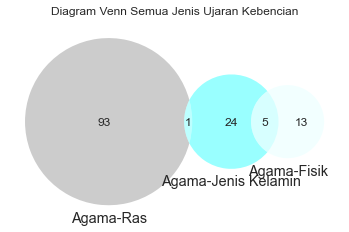

In [36]:
from matplotlib_venn import venn3, venn3_circles 
  
# depict venn diagram 
venn3(subsets=(93, 13, 0, 24, 1, 5, 0),  
      set_labels=('Agama-Ras', 'Agama-Fisik', 'Agama-Jenis Kelamin'),  
      set_colors=("grey", "lightcyan", "cyan")) 
  
#(relra - relragen - relraphy), (relphy - relgenphy - relraphhy), relraphy, (relgen-relgenphy - relgenra), relragen, relgenphy, hsall
# title of the venn diagram 
plt.title("Diagram Venn Semua Jenis Ujaran Kebencian") 
plt.show()


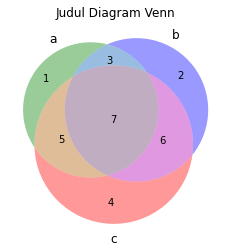

In [29]:
#venn3(subsets=(1, 2, 3, 4, 5, 6, 7),  
#     set_labels=('a', 'b', 'c'),  
#     set_colors=("green", "blue", "red")) 
  
#title of the venn diagram 
#plt.title("Judul Diagram Venn") 
#plt.show()

408

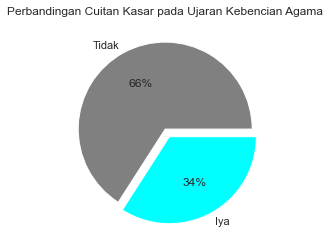

In [37]:
explode = [0, 0.1] 
relab = ((df1['HS_Religion'] == True) & (df1['Abusive'] == True)).sum()
label= ['Tidak','Iya']
s=[789,relab]
plt.pie(s,labels = label, explode=explode, autopct='%.0f%%', colors=['grey','cyan'])
plt.title('Perbandingan Cuitan Kasar pada Ujaran Kebencian Agama')
relab

## data abusive

In [38]:
abus = df.Abusive == True
df2=df[abus]
df2.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,tweet-clean
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,semua cowok berusaha melacak perhatian gue lan...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa telat memberi tau edan sarap gue bergaul...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir kelihatan dongoknya awal tam...
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0,bani taplak kawan kawan
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0,gue baru selesai re watch aldnoah zero paling ...


Text(0.5, 1.0, 'Perbandingan Ujaran Kebencian Agama pada Cuitan Kasar')

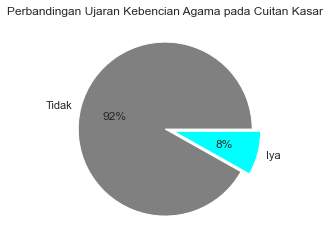

In [39]:
explode = [0, 0.1] 
s = df2['HS_Religion'].value_counts()
label= ['Tidak','Iya']
plt.pie(s,labels = label, explode=explode, autopct='%.0f%%', colors=['grey','cyan'])
plt.title('Perbandingan Ujaran Kebencian Agama pada Cuitan Kasar')

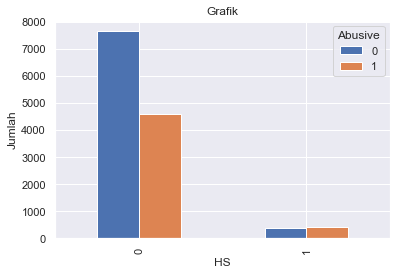

In [40]:
dff1= pd.crosstab(df['HS_Religion'],df['Abusive'])
dff1.plot(kind='bar')
plt.xlabel('HS')
plt.ylabel('Jumlah')
plt.title('Grafik')
plt.show()

#crosstab tidak dipakai karena HS-agama kurang dapat terlihat

In [77]:
#!pip install venny4py

You should consider upgrading via the 'C:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
